<a href="https://colab.research.google.com/github/ashisaxena710/Cardiovascular-Risk-Prediction/blob/main/IndividualColabAshi_CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification


# **Problem Statement**


The dataset is from ongoing cardiovascular study  on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

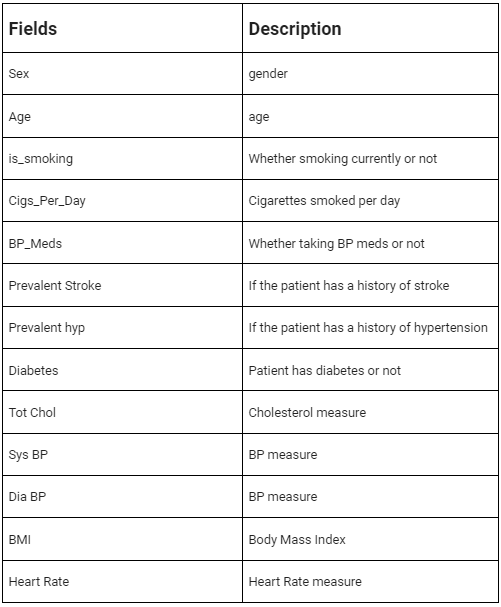

# ***Let's Begin !***

### Import Libraries

In [231]:
# For data visualisation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 3/data_cardiovascular_risk.csv")

In [234]:
# First view of dataset
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [235]:
# Dataset Rows & Columns count
print(f'The Cardiovascular Risk prediction Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Cardiovascular Risk prediction Dataset has 3390 rows and 17 columns.


In [236]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [237]:
# Dataset Duplicate Value Count
print(f"Total number of duplicate rows present in the dataset is {df.duplicated().sum()}")

Total number of duplicate rows present in the dataset is 0


In [238]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

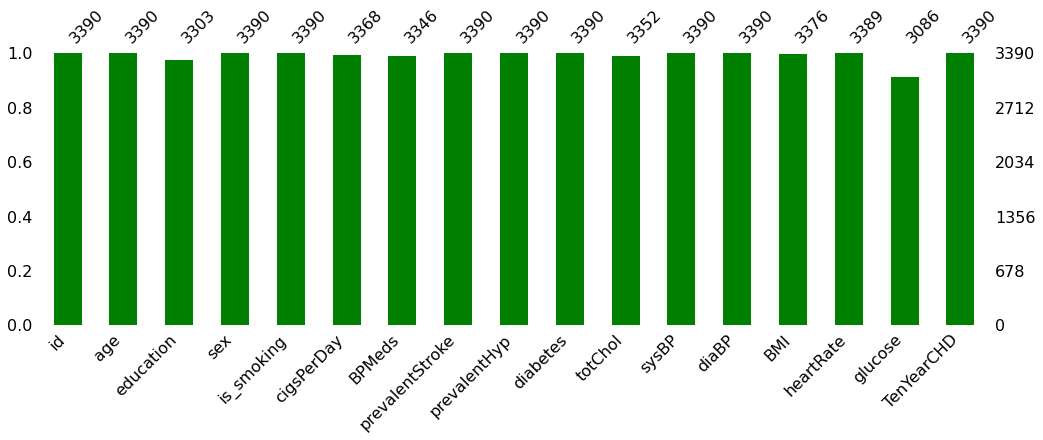

In [239]:
# Visualizing the missing values
msno.bar(df,figsize=(17,5), color="green")

Got to know the following points about our dataset:

*   It contains 3390 rows and 17 columns.
*   Only two columns i.e sex and is_smoking are of Object datatype. Rest are of int and float datatypes.

*   There are no duplicate rows in our dataset.
*   Columns containing null values are - education , cigsPerDay , BPMeds , totChol , BMI , heartRate and gloucose . The column 'heartRate' contain only one null values whereas the column 'glucose' contain maximum number of null values.





##  ***Understanding Variables***

In [240]:
# Dataset Columns
print(df.columns.tolist())

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [241]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

• Sex:- male or female("M" or "F")

• Age:- Age of the patient

• Education:-

• is_smoking:- whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day:- the number of cigarettes that the person smoked on average in one day

• BP Meds:- whether or not the patient was on blood pressure medication

• Prevalent Stroke:- whether or not the patient had previously had a stroke

• Prevalent Hyp:- whether or not the patient was hypertensive

• Diabetes:- whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol:- total cholesterol level

• Sys BP:- systolic blood pressure

• Dia BP:- diastolic blood pressure

• BMI:- Body Mass Index

• Heart Rate:- heart rate

• Glucose:- glucose level

• TenYearCHD:- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Checking Unique Values for each variable.

In [242]:
# Unique values for each variable
for i in df.columns.tolist():
  print(f"{i} : {df[i].nunique()}")

id : 3390
age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


## ***Data Wrangling***

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:
1. Distribution of data
2. Outliers in the data

In [243]:
# Dropping the first id column 
df=df.drop(['id'] , axis = 1)

In [244]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

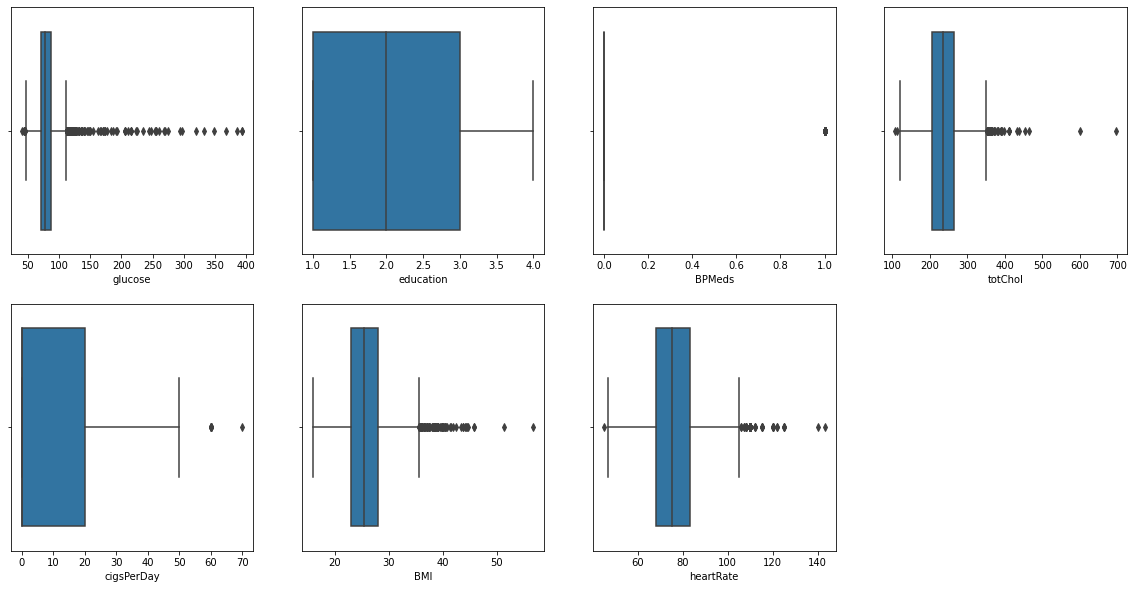

In [245]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(20,10))
for i,j in enumerate(null_list):
  plt.subplot(2,4,i+1)
  sns.boxplot(df[j])
plt.show()

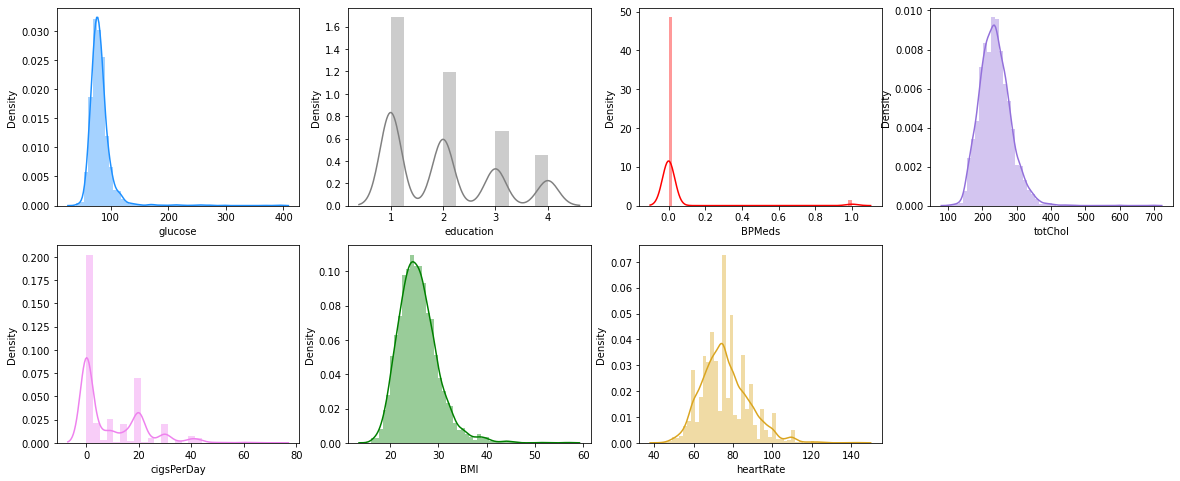

In [246]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Median
6. "BMI" -> Median
7. "heartRate" -> Median

In [247]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [248]:
df['cigsPerDay'].mean()

9.069477434679335

In [249]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## ***Data Vizualization***

Now we will do data visualization in an structured way following ' UBM ' rule

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

####Univariate Analysis

Our target column is ' TenYearCHD ' . Let ' s check the distribution of this column first .

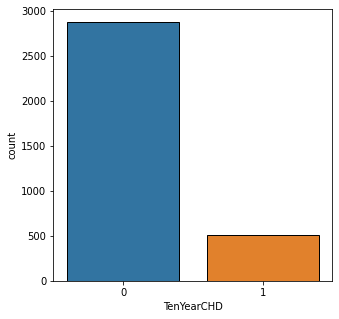

In [250]:
# TenYearCHD
plt.figure(figsize=(5,5))
sns.countplot(df['TenYearCHD'],edgecolor='black')
plt.show()

# plt.figure(figsize=(13,5))

# df["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})

# plt.show()

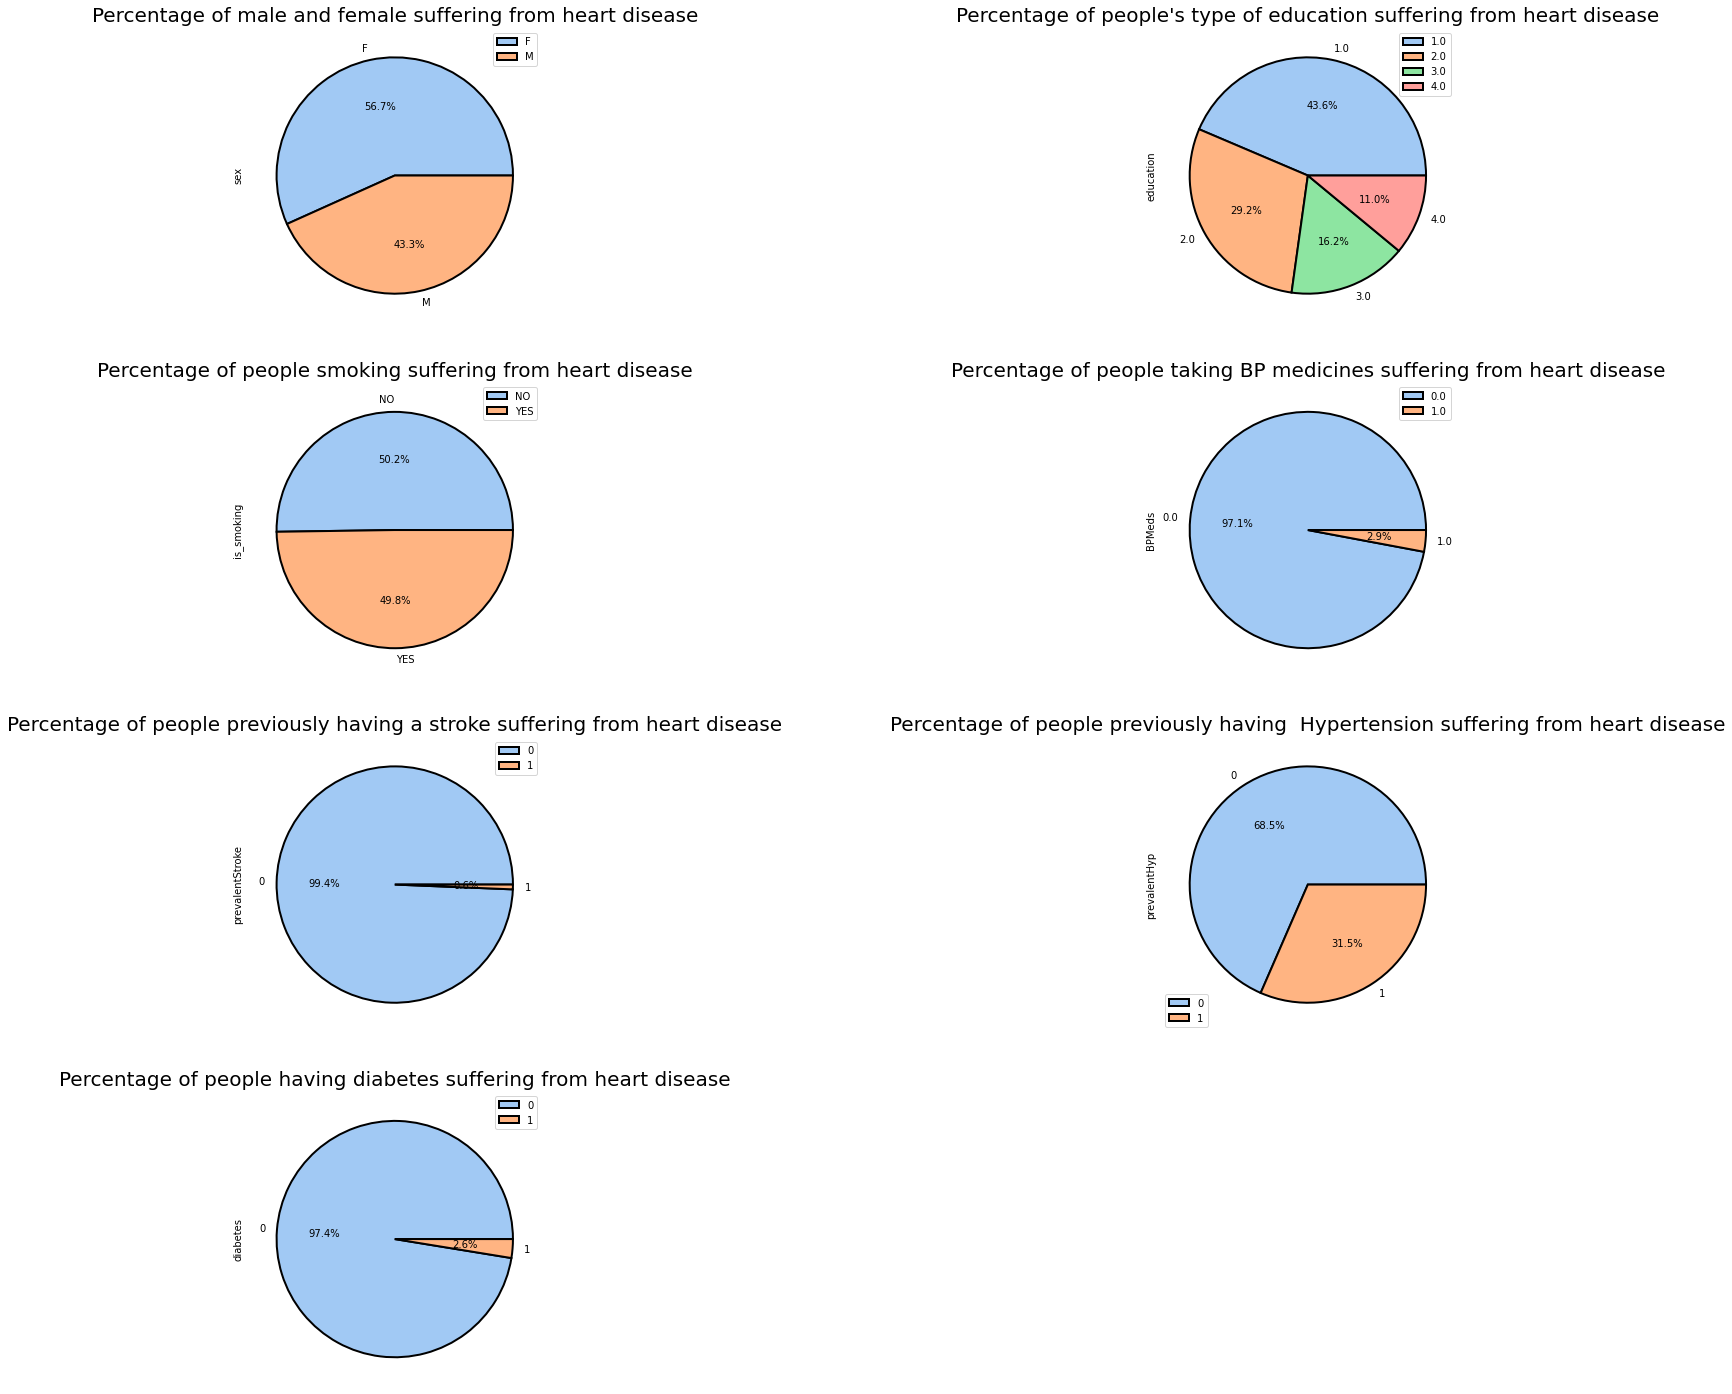

In [251]:
Categorical_columns=['sex' , 'education' , 'is_smoking' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']

plt.figure(figsize=(30,25))

#sex
plt.subplot(4,2,1)
df["sex"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of male and female suffering from heart disease",fontsize=20)

#education
plt.subplot(4,2,2)
df["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people's type of education suffering from heart disease",fontsize=20)

#is_smoking
plt.subplot(4,2,3)
df["is_smoking"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people smoking suffering from heart disease",fontsize=20)

#BPMeds
plt.subplot(4,2,4)
df["BPMeds"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people taking BP medicines suffering from heart disease",fontsize=20)

#prevalentStroke
plt.subplot(4,2,5)
df["prevalentStroke"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people previously having a stroke suffering from heart disease",fontsize=20)

#prevalentHyp
plt.subplot(4,2,6)
df["prevalentHyp"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people previously having  Hypertension suffering from heart disease",fontsize=20)

#diabetes
plt.subplot(4,2,7)
df["diabetes"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of people having diabetes suffering from heart disease",fontsize=20)

plt.show()

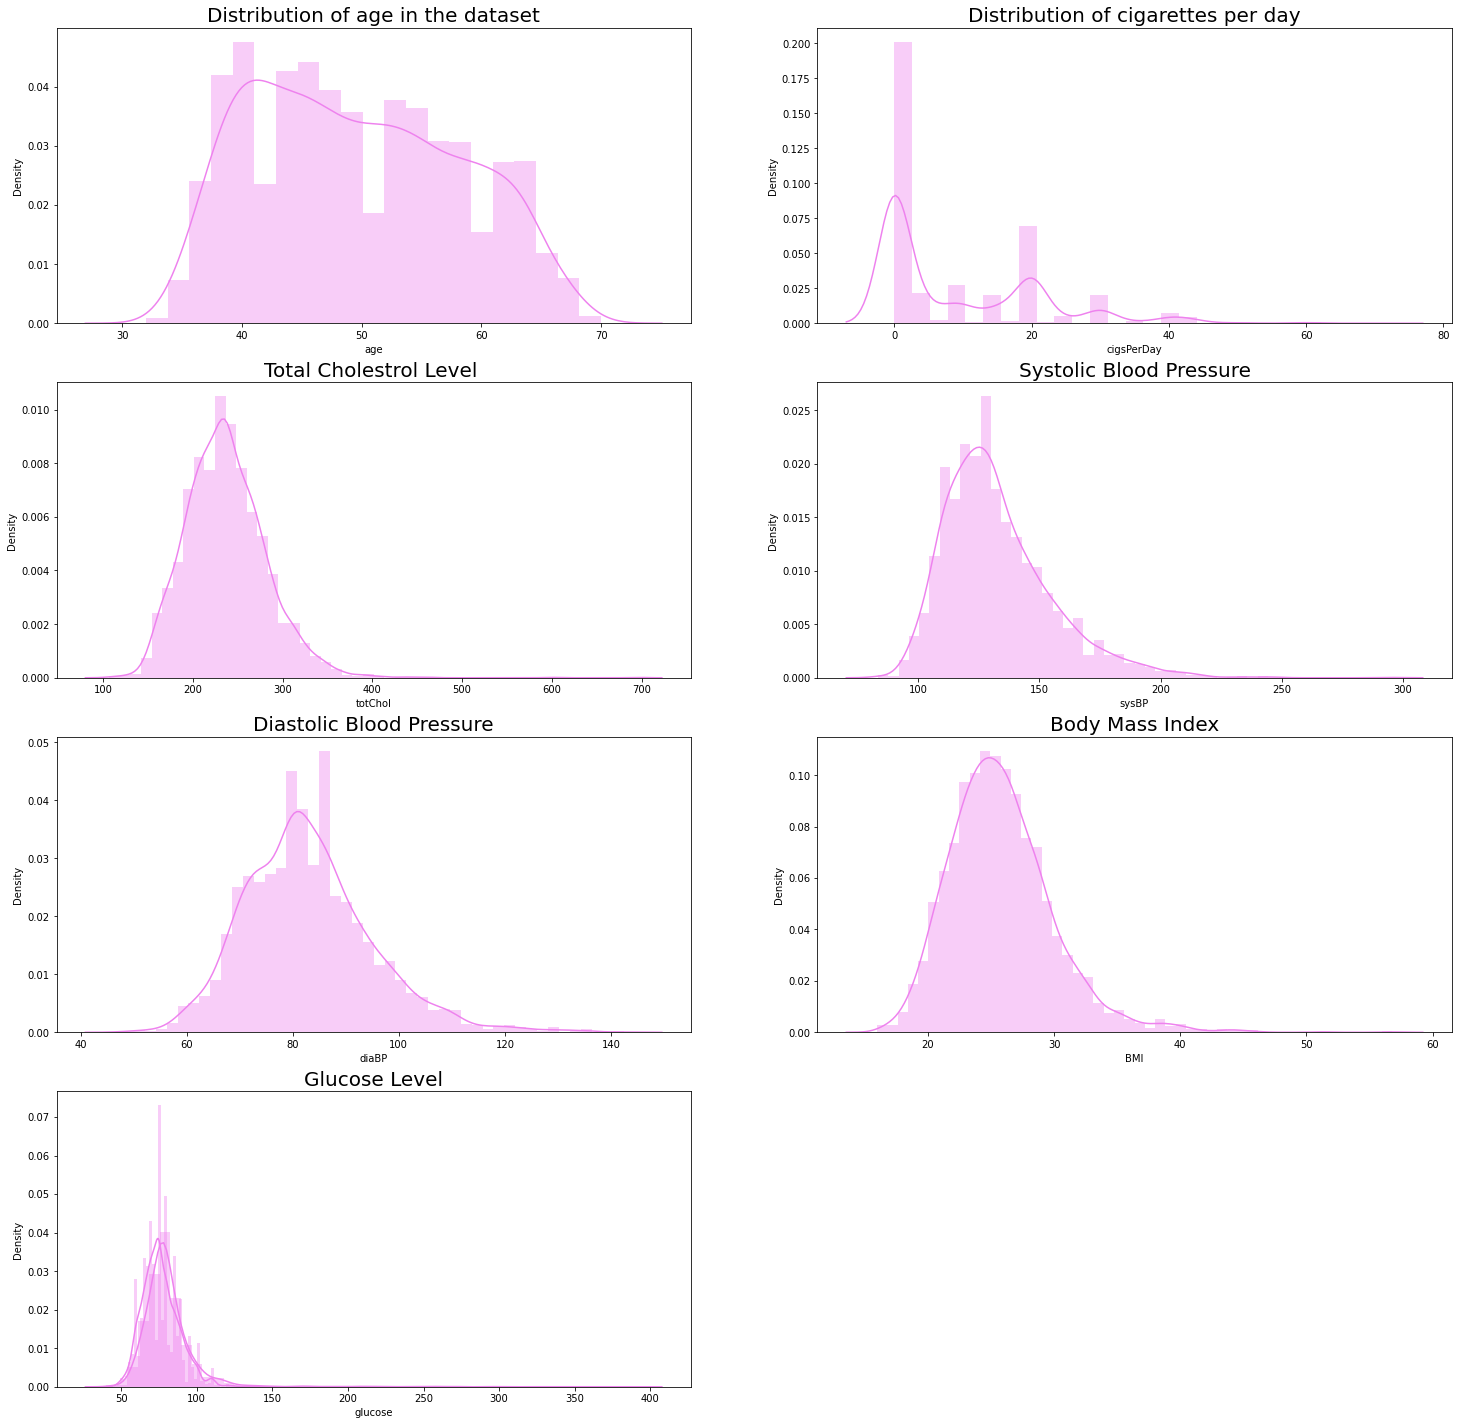

In [252]:
Continuous_columns=['age' , 'cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate' , 'glucose']

plt.figure(figsize=(25,25))

#age
plt.subplot(4,2,1)
sns.distplot(df['age'],color='violet')
plt.title("Distribution of age in the dataset",fontsize=20)

#cigsPerDay
plt.subplot(4,2,2)
sns.distplot(df['cigsPerDay'],color='violet')
plt.title("Distribution of cigarettes per day",fontsize=20)

#totChol
plt.subplot(4,2,3)
sns.distplot(df['totChol'],color='violet')
plt.title("Total Cholestrol Level ",fontsize=20)

#sysBP
plt.subplot(4,2,4)
sns.distplot(df['sysBP'],color='violet')
plt.title("Systolic Blood Pressure",fontsize=20)

#diaBP
plt.subplot(4,2,5)
sns.distplot(df['diaBP'],color='violet')
plt.title("Diastolic Blood Pressure",fontsize=20)

#BMI
plt.subplot(4,2,6)
sns.distplot(df['BMI'],color='violet')
plt.title("Body Mass Index",fontsize=20)

#heartRate
plt.subplot(4,2,7)
sns.distplot(df['heartRate'],color='violet')
plt.title("Heart Rate",fontsize=20)

#glucose
plt.subplot(4,2,7)
sns.distplot(df['glucose'],color='violet')
plt.title("Glucose Level",fontsize=20)

plt.show()

###Bivariate Analysis

####Which age is more prone to Heart Diseases?

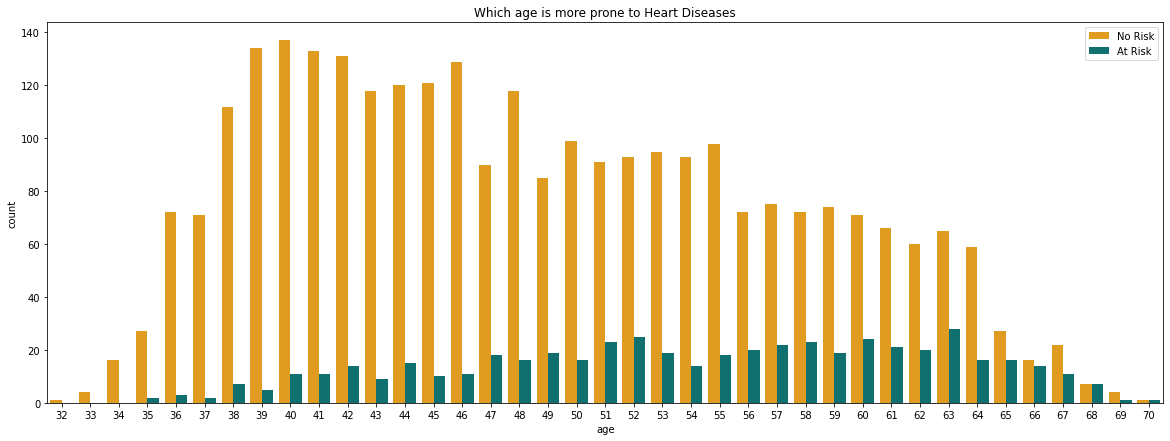

In [253]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (20,7))
sns.countplot(x = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which age is more prone to Heart Diseases")
plt.legend(['No Risk','At Risk'])
plt.show()

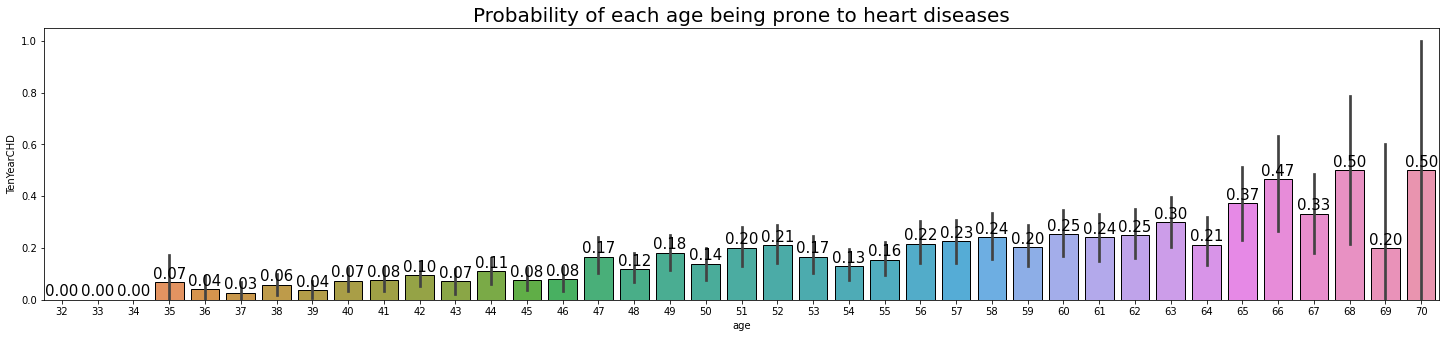

In [254]:
# Probability of each age being prone to heart disease
plt.figure(figsize=(25,5))
plots=sns.barplot(x=df['age'],y=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Probability of each age being prone to heart diseases",fontsize=20)    
plt.show()

***With increasing age chance of having heart diseases increases .***

####Which gender is more prone to Heart Diseases?

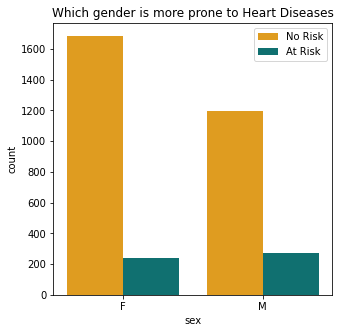

In [255]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (5,5))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to Heart Diseases")
plt.legend(['No Risk','At Risk'])
plt.show()

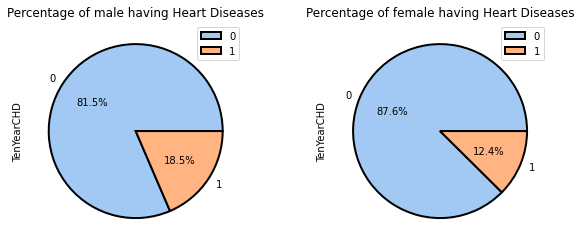

In [256]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
male_df=df[df["sex"]=='M']
male_df["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of male having Heart Diseases")

plt.subplot(1,2,2)
female_df=df[df["sex"]=='F']
female_df["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                                wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of female having Heart Diseases")

plt.show()

***Males have higher chances of having heart diseases as compared to females.***

####Which education type is more prone to Heart Diseases?

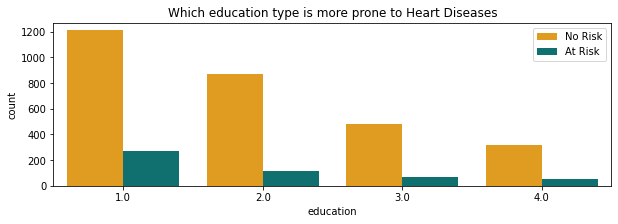

In [257]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,3))
sns.countplot(x = df['education'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which education type is more prone to Heart Diseases")
plt.legend(['No Risk','At Risk'])
plt.show()

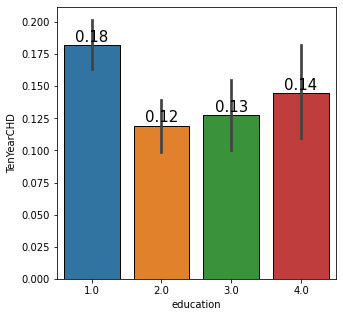

In [258]:
# Probability of each education type being prone to heart diseases
plt.figure(figsize=(5,5))
plots=sns.barplot(x=df['education'],y=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

####Do smoking more prone to heart diseases?

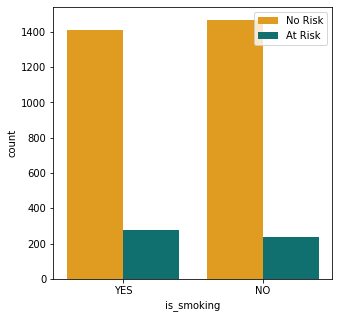

In [259]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.legend(['No Risk','At Risk'])
plt.show()

***This indicates that smoking is not the sole deciding factor for predicting whether the person gets coronary heart disease or not.***

#### Do people having BP Problems, history of strokes, hypertension and diabetes are prone to Heart Diseases???

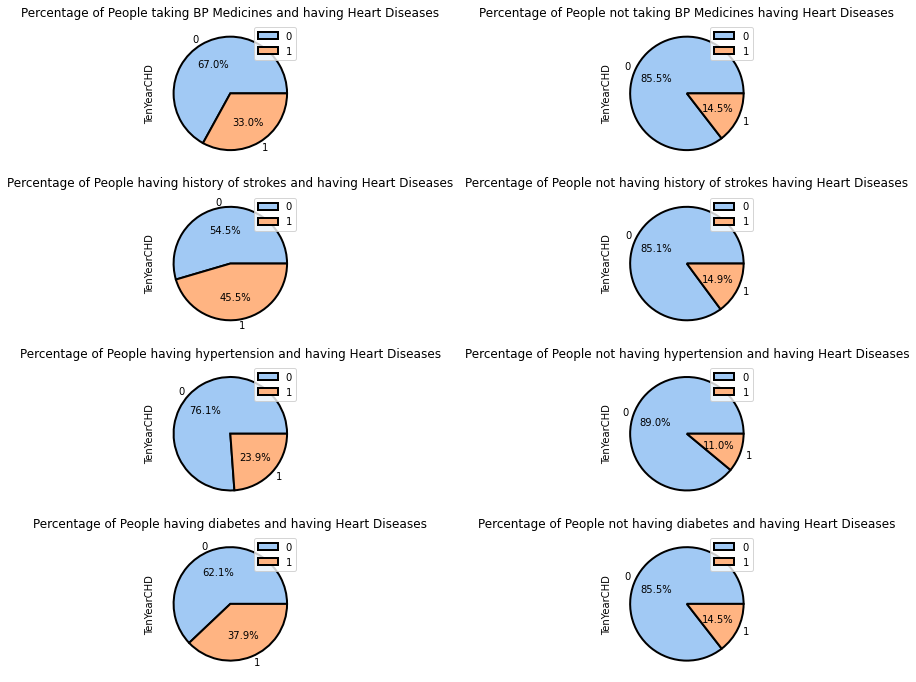

In [260]:
plt.figure(figsize=(15,12))

plt.subplot(4,2,1)
taking_BP_meds=df[df["BPMeds"]==1]
taking_BP_meds["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People taking BP Medicines and having Heart Diseases")

plt.subplot(4,2,2)
not_taking_BP_meds=df[df["BPMeds"]==0]
not_taking_BP_meds["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                                wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People not taking BP Medicines having Heart Diseases")


plt.subplot(4,2,3)
having_strokes=df[df["prevalentStroke"]==1]
having_strokes["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People having history of strokes and having Heart Diseases")

plt.subplot(4,2,4)
not_having_strokes=df[df["prevalentStroke"]==0]
not_having_strokes["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                                wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People not having history of strokes having Heart Diseases")

plt.subplot(4,2,5)
having_hypertension=df[df["prevalentHyp"]==1]
having_hypertension["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People having hypertension and having Heart Diseases")

plt.subplot(4,2,6)
not_having_hypertension=df[df["prevalentHyp"]==0]
not_having_hypertension["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                                wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People not having hypertension and having Heart Diseases")

plt.subplot(4,2,7)
having_diabetes=df[df["diabetes"]==1]
having_diabetes["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People having diabetes and having Heart Diseases")

plt.subplot(4,2,8)
not_having_diabetes=df[df["diabetes"]==0]
not_having_diabetes["TenYearCHD"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                                wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.title("Percentage of People not having diabetes and having Heart Diseases")

plt.show()

It is clearly seen that people having :

*   BP problems
*   history of strokes

*   Hypertension
*   Diabetes



are more likely to have heart diseases. 

###Multivariate Analysis

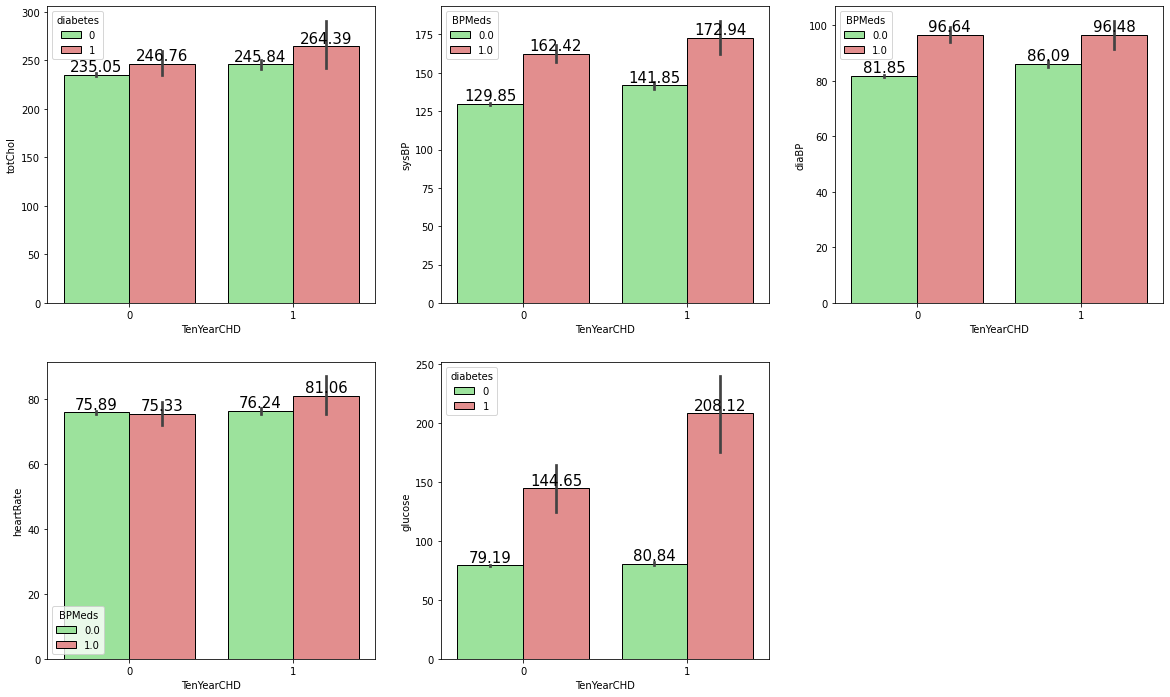

In [261]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(2,3,2)
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(2,3,3)
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"]) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.subplot(2,3,4)
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.subplot(2,3,5)
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

##  ***Correlation Heatmap***

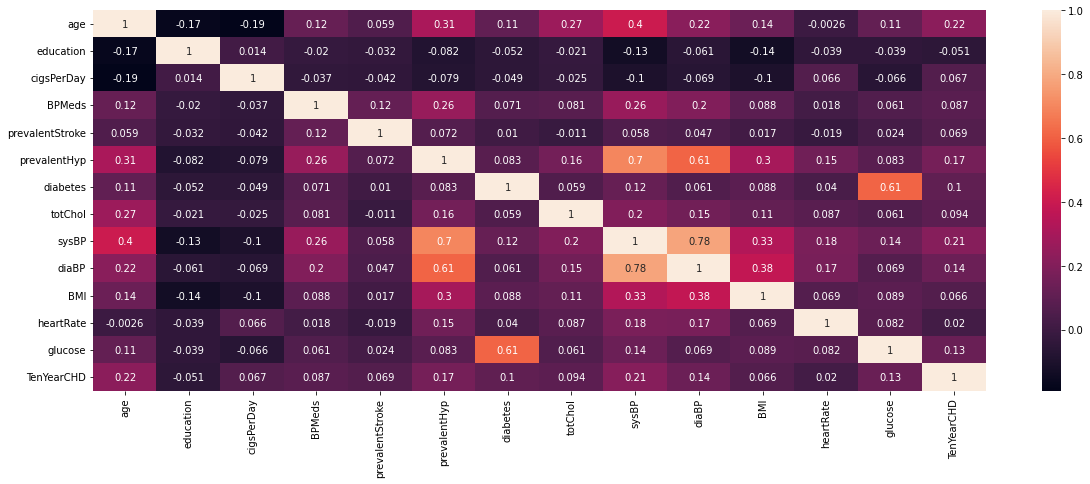

In [262]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that following have strong correlation : 

*   diaBP and sysBP
*   prevalentHyp and diaBP

*   prevalentHyp and sysBP
*   diabetes and glucose

Following have weak correlation :  

*   glucose and cigPerDay
*   BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education 
*   BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay






## ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [263]:
# Handling Missing Values & Missing Value Imputation

In [264]:
# Missing Values/Null Values Count
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

 We have already treated all the null values above, so we don't have any more null values in our dataset.

### 2. Handling Outliers

In cardiovascular risk prediction dataset , an outlier could represent a patient with an unusually high risk for cardiovascular disease, which could be important to identify in order to prevent potential health issues. Removing outliers could potentially lead to a loss of important information and biased results.

### 3. Categorical Encoding

Since, we have only two object dtype variable (sex and is_smoking) with two categories Male and Female, No and Yes. We can easily encode these categorical variable from BINARY LABEL ENCODING (0,1) and change the dtype from object to int.

In [265]:
# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [266]:
## Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In our dataset there are two features sysBP and diaBP and have normal range of 90/120 after and before this range a person could fall under the danger zone.
In medical science there is a patient attribute called Mean Arterial Pressure (MAP), which is a weighted average of the Systolic and Diastolic BP. The formula for MAP is:

MAP = DP + 1/3(SP – DP) or MAP = DP + 1/3(PP)

Where DP is the diastolic blood pressure, SP is the systolic blood pressure, and PP is the pulse pressure and the normal range of MAP is 70-100. 

So, let's create a feature of MAP which contains the information of both sysBP and diaBP.



In [267]:
# # Extracting a new feature MAP from existing feature sysBP and diaBP
# df['Mean Arterial Pressure']= round(df['diaBP']+(df['sysBP']-df['diaBP'])/3,2)

# # Checking the head after extracting new feature
# df.head()

#### 2. Feature Selection

In [268]:
df['pulse_pressure']= round(df['sysBP']-df['diaBP'],2)

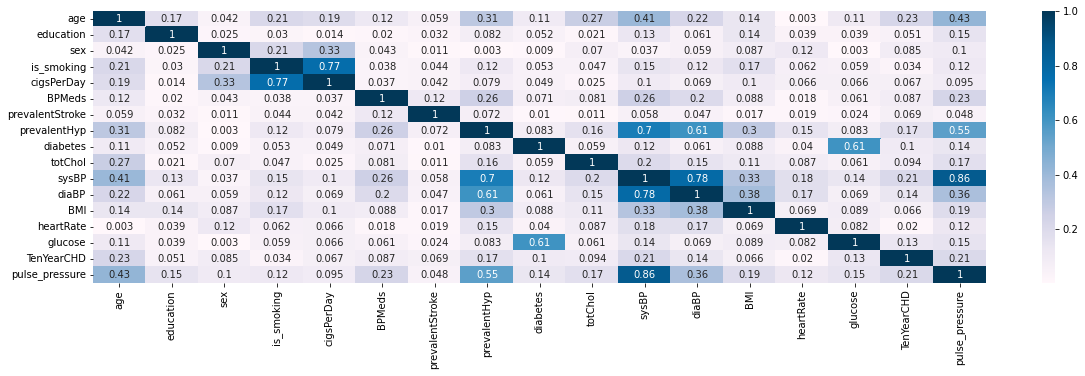

In [269]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,5))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap='PuBu')

In [270]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [271]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP']]])

,variables,VIF
0,age,39.362094
1,education,4.457594
2,sex,2.746178
3,cigsPerDay,1.855750
4,BPMeds,1.131707
5,prevalentStroke,1.026821
6,prevalentHyp,2.126258
7,diabetes,1.565066
8,totChol,30.353468
9,BMI,34.946681


In [272]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP','age']]])

,variables,VIF
0,education,4.457521
1,sex,2.744941
2,cigsPerDay,1.834652
3,BPMeds,1.131369
4,prevalentStroke,1.024803
5,prevalentHyp,2.120734
6,diabetes,1.555229
7,totChol,26.515729
8,BMI,32.856477
9,heartRate,34.941574


In [273]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP','age','heartRate']]])

,variables,VIF
0,education,4.377541
1,sex,2.616103
2,cigsPerDay,1.746262
3,BPMeds,1.127416
4,prevalentStroke,1.024700
5,prevalentHyp,2.117909
6,diabetes,1.522335
7,totChol,24.861854
8,BMI,27.833324
9,glucose,18.592054


In [274]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP','age','heartRate','glucose']]])

,variables,VIF
0,education,4.293931
1,sex,2.606625
2,cigsPerDay,1.742074
3,BPMeds,1.126754
4,prevalentStroke,1.023788
5,prevalentHyp,2.077309
6,diabetes,1.051192
7,totChol,23.790508
8,BMI,24.021304
9,pulse_pressure,16.333957


In [275]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP','age','heartRate','glucose','totChol']]])

,variables,VIF
0,education,4.119972
1,sex,2.525552
2,cigsPerDay,1.706704
3,BPMeds,1.126741
4,prevalentStroke,1.023676
5,prevalentHyp,2.056991
6,diabetes,1.051175
7,BMI,14.837986
8,pulse_pressure,14.949853


In [276]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD','is_smoking','sysBP','diaBP','age','heartRate','glucose','totChol','BMI']]])

,variables,VIF
0,education,3.503647
1,sex,2.484463
2,cigsPerDay,1.655375
3,BPMeds,1.120898
4,prevalentStroke,1.023355
5,prevalentHyp,2.045698
6,diabetes,1.051031
7,pulse_pressure,6.921965


Now we can see that each feature above has VIF less than 10 , which is good .

We will now consider new dataframe consisting of above columns only and ofcourse target column ' TenYearCHD ' will also be include in this .

In [277]:
# New Dataframe which will be our final dataframe
final_df = df[["education","sex","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","pulse_pressure","TenYearCHD"]]

final_df.head()

,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,pulse_pressure,TenYearCHD
0,2.0,1,3.0,0.0,0,0,0,63.0,1
1,4.0,0,0.0,0.0,0,1,0,70.0,0
2,1.0,1,10.0,0.0,0,0,0,45.0,0
3,1.0,0,20.0,0.0,0,1,0,70.0,1
4,1.0,1,30.0,0.0,0,0,0,51.5,0


### 5. Data Transformation

In [278]:
# Storing the continuous variable in a separate list
cont_variables=["cigsPerDay","pulse_pressure"]

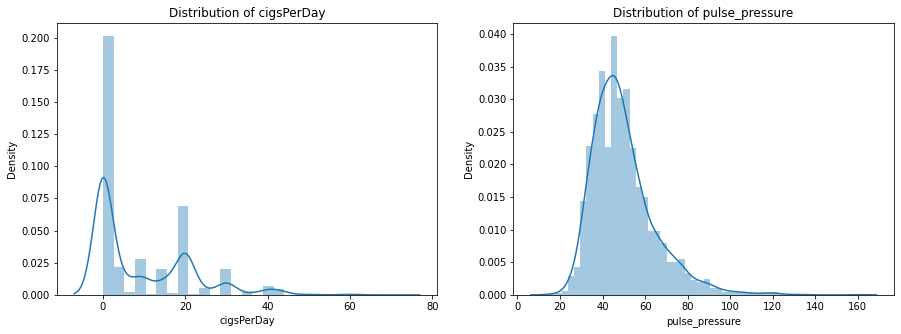

In [279]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(15,5))
for i,colm in enumerate(cont_variables):
  plt.subplot(1,2,i+1)
  sns.distplot(final_df[colm])
  plt.title(f"Distribution of {colm}")

After Applying Transformation


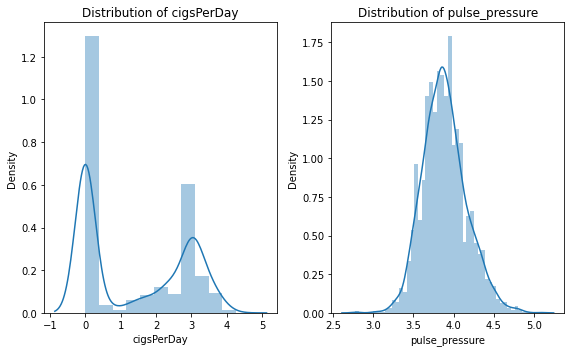

In [280]:
# Applying transformation on the above considered columns
final_df["cigsPerDay"]=np.log(final_df["cigsPerDay"]+1)
final_df["pulse_pressure"]=np.log(final_df["pulse_pressure"]+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

### 6. Data Scaling

In [284]:
# Creating x (independent) and y (dependent) variables
x=final_df[["education","sex","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","pulse_pressure"]]
y=final_df[["TenYearCHD"]]

# scaling our final data
# Importing standard scaler library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.